In [18]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm.auto import tqdm
tqdm.pandas(desc="my bar!")
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [6]:
df_amazon = pd.read_csv("amazon_cells_labelled.txt", sep="\t")
df_imdb = pd.read_csv("imdb_labelled.txt", sep="\t")
df_yelp = pd.read_csv("yelp_labelled.txt", sep="\t")


In [7]:
df_reviews = pd.concat([df_amazon, df_imdb, df_yelp])
df_reviews = df_reviews.sample(frac=1).reset_index(drop=True)
df_reviews

,reviews,sentiment
0,worthless product.,0
1,a drive thru means you do not want to wait aro...,0
2,I gave it a 10,1
3,this is the worst sushi i have ever eat beside...,0
4,My ribeye steak was cooked perfectly and had g...,1
...,...,...
2743,RUDE & INCONSIDERATE MANAGEMENT.,0
2744,This is one of the better buffets that I have ...,1
2745,"You get incredibly fresh fish, prepared with c...",1
2746,"Very true to Shakespear, and a 'must' for all ...",1


In [8]:
df_reviews.isnull().sum()

reviews      0
sentiment    0
dtype: int64

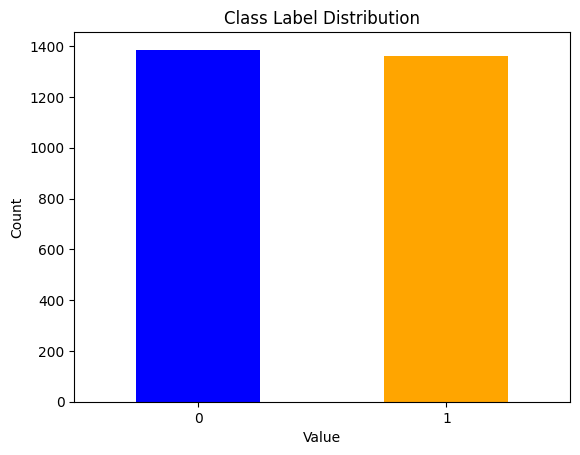

In [20]:
# Count the occurrences of 0 and 1 in the 'column_name'
counts = df_reviews['sentiment'].value_counts()

# Plot the bar chart
counts.plot(kind='bar', color=['blue', 'orange'])

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Class Label Distribution')

# Display the plot
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)
plt.show()

In [13]:
nlp = spacy.load("en_core_web_sm")
def preprocessor(text):
    text = text.lower()
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ''.join(emoticons).replace('-', '')
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc if token.text not in STOP_WORDS])
    return text

In [16]:
df_reviews["preprocessed"] = df_reviews["reviews"].progress_apply(preprocessor)

my bar!: 100%|██████████| 2748/2748 [00:10<00:00, 272.75it/s]


In [23]:
df_reviews[df_reviews["sentiment"] == 1]

,reviews,sentiment,preprocessed
2,I gave it a 10,1,give 10
4,My ribeye steak was cooked perfectly and had g...,1,ribeye steak cook perfectly great mesquite flavor
5,The chicken was deliciously seasoned and had t...,1,chicken deliciously season perfect fry outside...
6,Pretty good beer selection too.,1,pretty good beer selection
9,Much less than the jawbone I was going to repl...,1,jawbone go replace
...,...,...,...
2736,We would recommend these to others.,1,recommend
2739,Razr Battery - Good buy.,1,razr battery good buy
2744,This is one of the better buffets that I have ...,1,well buffet
2745,"You get incredibly fresh fish, prepared with c...",1,incredibly fresh fish prepare care
